# 2.3.4 Naive Bayes

### 훈련 속도는 빠르지만 일반화 성능이 LinearSVC, LogisticRegression과 같은 선형 분류기보다 뒤짐. 각 특성을 개별로 취급해 파라미터를 학습하고, 각 특성에서 클래스별 통계를 단순하게 취합하기 때문.

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Intro to ML basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

In [ ]:
X.transpose() # = X.T

In [ ]:
np.unique(y) # class

In [ ]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복. 특성마다 1이 나타난 횟수 센다.
    counts[label] = X[y == label].sum(axis=0)
print('feature counts:\n', counts)

##### 0(class 0): feature1=0, feature2=1, feature3=0, feature4=2
##### 1(class 1): feature1=2, feature2=0, feature3=2, feature4=1

# 2.3.5 Decision Tree

In [13]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

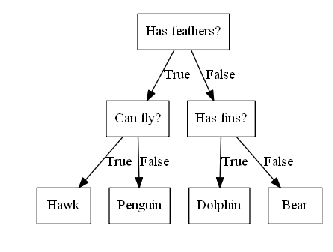

In [17]:
mglearn.plots.plot_animal_tree()

### overfitting 방지 전략
- 1. Pre-pruning (사전 가지치기): 트리 생성을 일찍 중단
- 2. (post) Pruning ( (사후) 가지치기): 트리 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합.
##### 모든 leaf node가 pure node가 될 때까지 진행하면 너무 복잡해지고 훈련 데이터에 과대적합된다.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('train acc: {:.3f}'.format(tree.score(X_train, y_train)))
print('test acc: {:.3f}'.format(tree.score(X_test, y_test)))

train acc: 1.000
test acc: 0.937


In [20]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) # 방법1. 일정 깊이에 도달하면 트리 성장 멈추게.
tree.fit(X_train, y_train)

print('train acc: {:.3f}'.format(tree.score(X_train, y_train)))
print('test acc: {:.3f}'.format(tree.score(X_test, y_test)))

train acc: 0.988
test acc: 0.951


In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'], feature_names=cancer.feature_names,
                impurity=False, filled=True)

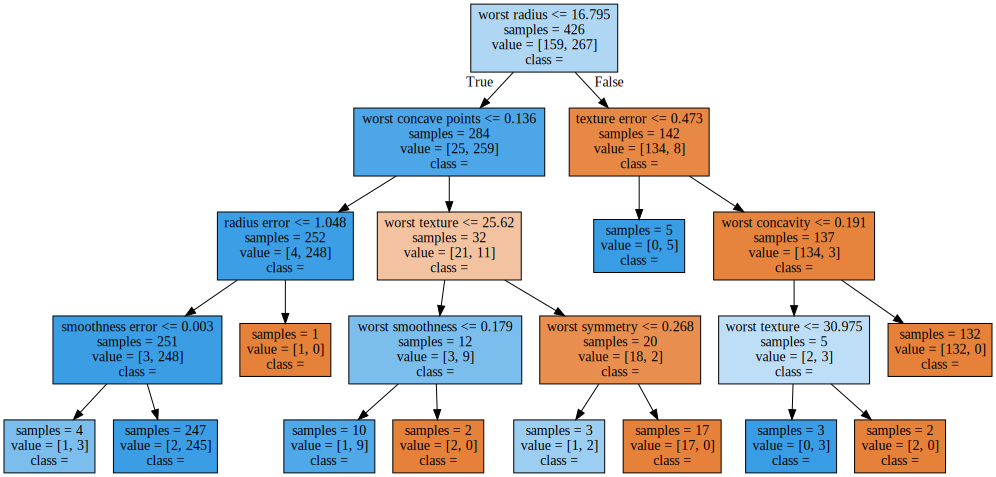

In [30]:
import graphviz
with open('tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [31]:
print('특성 중요도:\n', tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


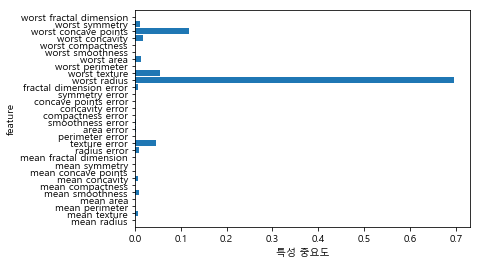

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

In [33]:
# matplotlib에서 한글 사용하는 법

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Feature importances: [0. 1.]


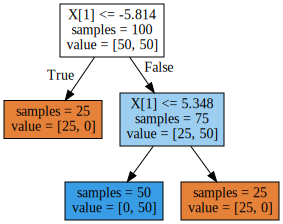

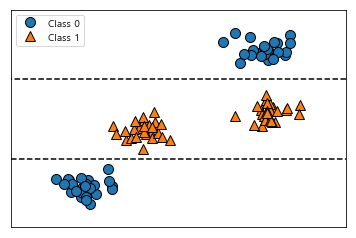

In [35]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#### 이 예로 알 수 있는 것: feature와 class 사이의 관계는 간단하지 않을 수 있다. X[1] 정보만 사용되었고, X[0] 특성은 전혀 사용되지 않음. 그리고 X[1]도 단순 비례|반비례 관계가 아님. (XOR 처럼)

### 트리 기반 회귀 모델은 외삽(extrapolation, 훈련 데이터 범위 밖의 포인트에 대해 예측)이 불가능.

Text(0, 0.5, 'price $/Mbyte')

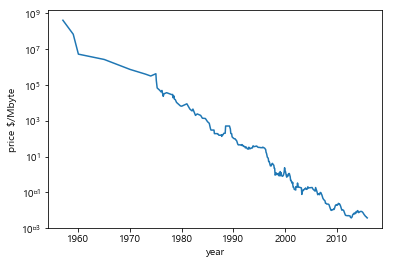

In [47]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)    # 그래프를 로그 스케일로 그리면 약간 굴곡 제외하면 선형적으로 나타나 예측하기 쉬워짐.
plt.xlabel('year')
plt.ylabel('price $/Mbyte')

In [50]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [52]:
from sklearn.linear_model import LinearRegression

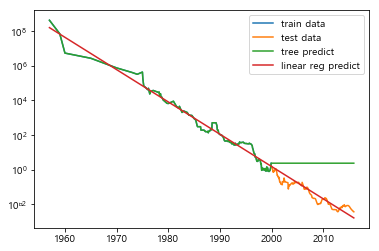

In [55]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 기준으로 이전은 trainset, 이후는 testset
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측, 날짜 특성만 이용
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price) # 데이터와 타깃 사이의 관계를 간단히 하려 로그 스케일로 변환

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis] # 예측은 전체 기간에 대해 수행

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree) # 예측한 값의 로그 스케일을 되돌려줌.
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label = 'train data')
plt.semilogy(data_test.date, data_test.price, label = 'test data')
plt.semilogy(ram_prices.date, price_tree, label = 'tree predict')
plt.semilogy(ram_prices.date, price_lr, label = 'linear reg predict')
plt.legend()

In [56]:
# 트리 모델은 훈련 데이터 밖의 새로운 데이터 예측 능력 없다. but 트리 기반 모델로 예측도 가능(가격 오르거나 내릴지 예측 등)
# 이 예제의 목적은 트리 모델이 시계열 데이터엔 잘 맞지 않는다는 것과 트리가 어떻게 예측을 만드는지 그 특성 보여주기 위함)

# 2.3.6 Ensemble (결정 트리의 앙상블)
### 1. Random Forest   2. Gradient Boosting

## Random Forest
#### 결정 트리의 문제점은 과대적합 쉽게 발생. 결정 트리를 많이 만들어 (무작위로 많은 트리 생성) 해결하는 방법.
#### Bootstrap sampling: 부트스트랩 샘플링을 통해 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 한다. n_samples 개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출 (한 샘플이 중복 추출되거나 누락될 수 있음)
#### 핵심 매개변수: max_features

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [6]:
X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

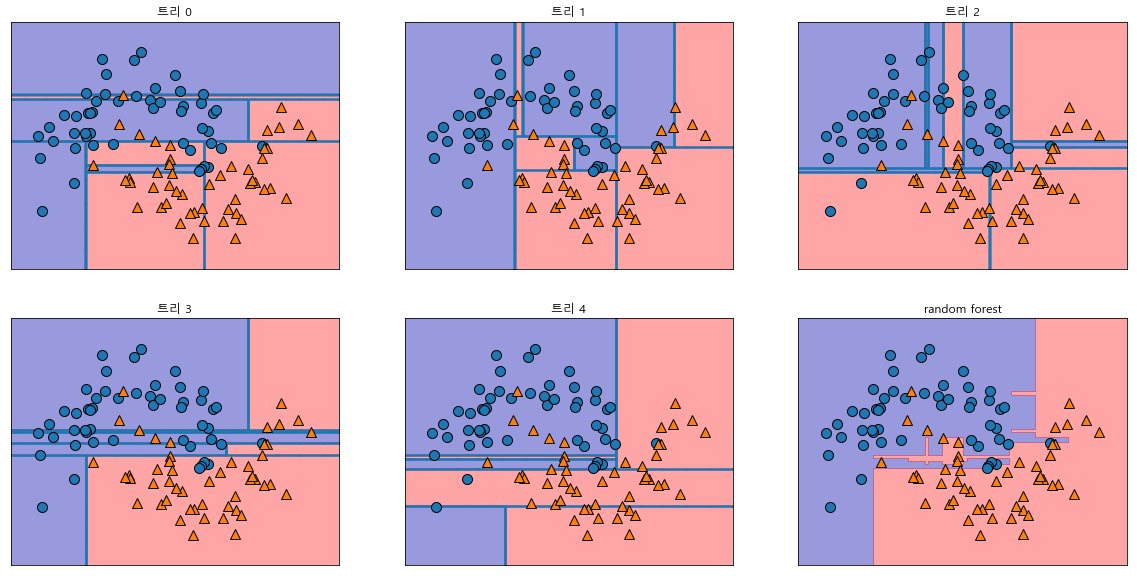

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('train acc: {:.3f}'.format(forest.score(X_train, y_train)))
print('test acc: {:.3f}'.format(forest.score(X_test, y_test)))

train acc: 1.000
test acc: 0.972


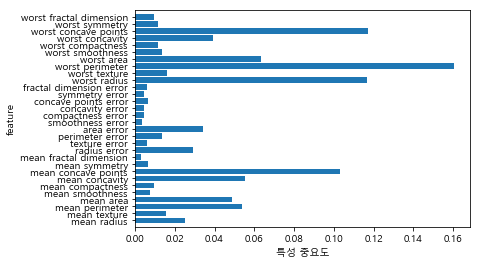

In [17]:
plot_feature_importances_cancer(forest)

In [18]:
# 랜덤 포레스트는 텍스트 데이터와 같이 매우 차원이 높고 희소한 데이터에서 잘 작동 x. (이런 데이터는 선형 모델이 적합)
# n_jobs 매개변수로 코어 수 지정. -1로 지정시 모든 코어 가동. (내 컴은 4 코어)
# n_estimators 클수록 좋다. 더 많은 트리 -> 과대적합 더 줄여 안정적. but 훈련 시간 길어짐

### Gradient Boost Regression Tree
#### 이름은 회귀 트리지만 회귀와 분류 모두 가능. 랜덤 포레스트와 달리 이전 트리의 오차를 보완하는 식으로 순차적으로 트리 생성. 무작위성x. 강력한 사전 가지치기. weak learner를 많이 연결.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('train acc: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test acc: {:.3f}'.format(gbrt.score(X_test, y_test)))

train acc: 1.000
test acc: 0.965


In [21]:
# train acc이 100% -> 과대적합이므로 최대 깊이를 줄여 1. 사전 가지치기 강하게 2. 학습률 낮추기

In [20]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('train acc: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test acc: {:.3f}'.format(gbrt.score(X_test, y_test)))

train acc: 0.991
test acc: 0.972


In [38]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('train acc: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test acc: {:.3f}'.format(gbrt.score(X_test, y_test)))

train acc: 0.988
test acc: 0.965


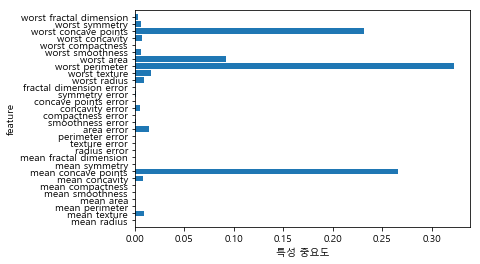

In [39]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [40]:
# 랜덤 포레스트와 비슷한 특성 강조하고 있지만, 일부 특성을 완전히 무시한다는 점에서 다르다.
# xgboost: 대용량 분산 처리를 위한 그래디언트 부스팅 오픈소스 라이브러리

In [41]:
# 랜덤 포레스트와 달리 n_estimators가 크면 모델이 복잡해지고 과대적합될 가능성 많음. learning_rate도 중요 변수.

# 2.3.7 배깅, 엑스트라 트리, 에이다부스트

In [15]:
Xm, ym = make_moons(n_samples=100, noise=.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

### Bagging (Bootstrap aggregating* 의 줄임말) *합계, 총합; 종합
#### 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용해 분류기를 다르게 학습 -> predict_proba() 메서드 지원하는 경우 확률값 평균하여 예측 수행, 아닐 시 가장 빈도가 높은 클래스 레이블이 예측 결과

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, verb

In [20]:
# n_estimators: 훈련할 분류기 개수
# oob_score = True: (Out Of Bag 오차) 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가(defualt = False)

In [21]:
print('train acc: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('test acc: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB sample acc: {:.3f}'.format(bagging.oob_score_))

train acc: 0.962
test acc: 0.958
OOB sample acc: 0.948


In [25]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

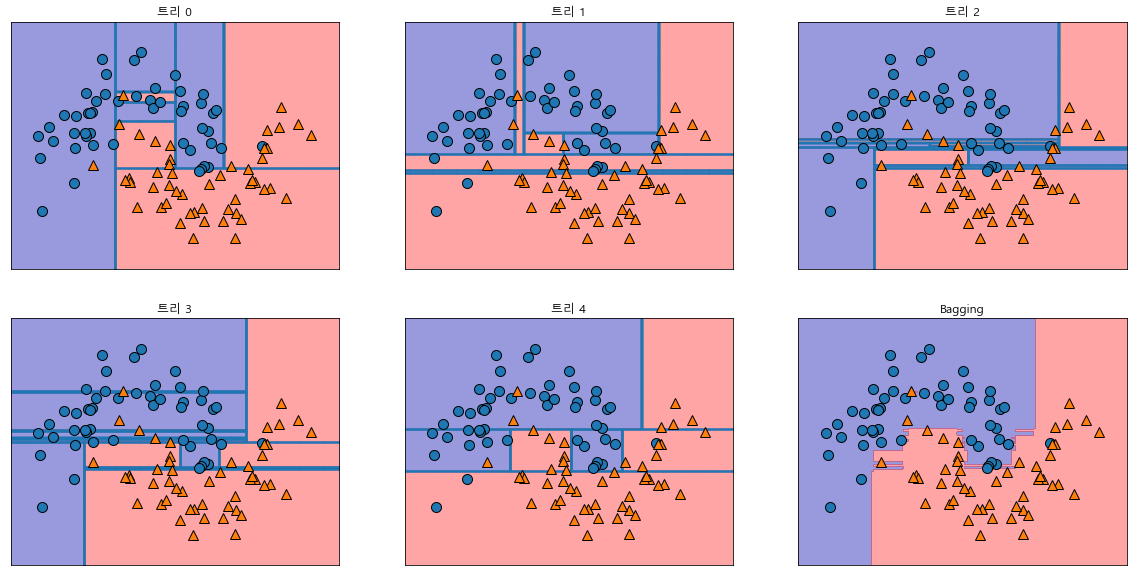

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)    
axes[-1, -1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [29]:
# 랜덤포레스트와 비슷한 결정 경계 보여줌. 다음으로는 n_estimators=100으로 늘려서 성능 확인.

In [30]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print('train acc: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('test acc: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB sample acc: {:.3f}'.format(bagging.oob_score_))

train acc: 1.000
test acc: 0.965
OOB sample acc: 0.951


### Extra-Tree
#### 랜덤포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할 찾음.
#### 랜덤포레스트와 달리 slitter='random' (랜포는 'best') 사용하고, 부트스트랩 샘플링은 적용 x.
#### 무작위성을 증가시키면 일반적으로 모델의 편향은 늘지만 분산이 감소

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=4, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=4,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

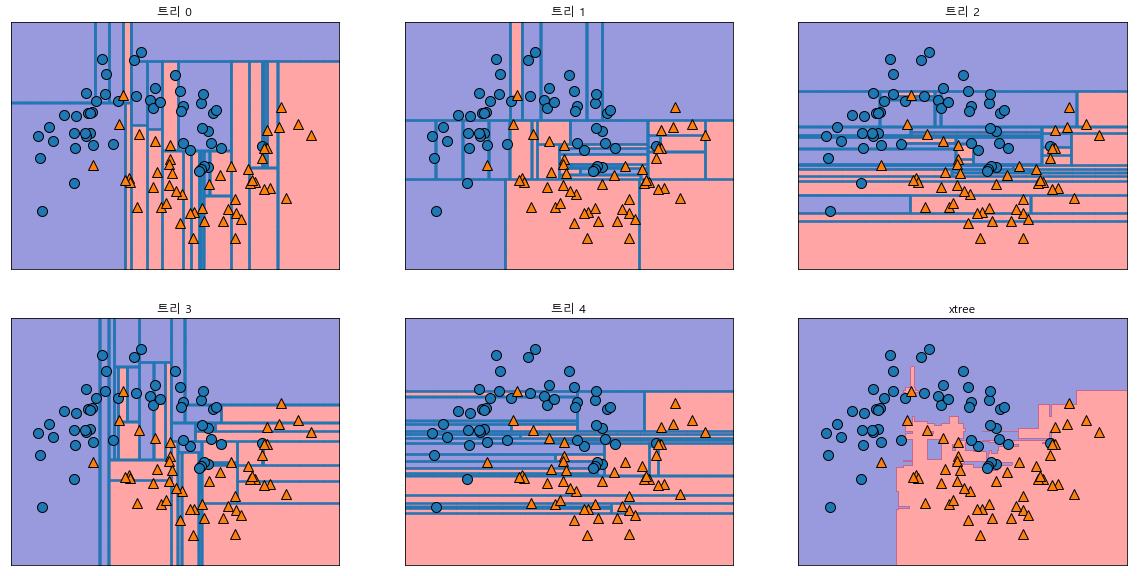

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)    
axes[-1, -1].set_title('xtree')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [34]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=1, random_state=0)
xtree.fit(Xc_train, yc_train)

print(xtree.score(Xc_train, yc_train), 'train acc / test acc',xtree.score(Xc_test, yc_test))

1.0 train acc / test acc 0.972027972027972


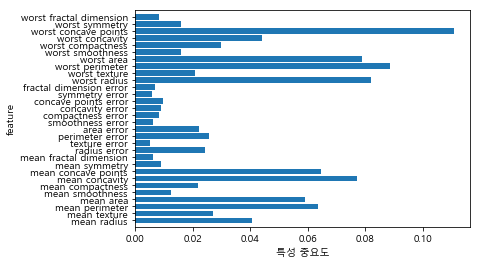

In [35]:
plot_feature_importances_cancer(xtree)

### AdaBoost (Adaptive Boosting)
#### 그래디언트부스팅처럼 약한 학습기 사용, but 이전의 모델이 잘못 분류한 샘플에 가중치를 높여 다음 모델 훈련.
#### 예측을 만들 때 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산해 가장 높은 값을 가진 레이블 선택
#### 그래디언트부스팅과 마찬가지로 순차적 학습이기 때문에 n_jobs 매개변수 지원 x.

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

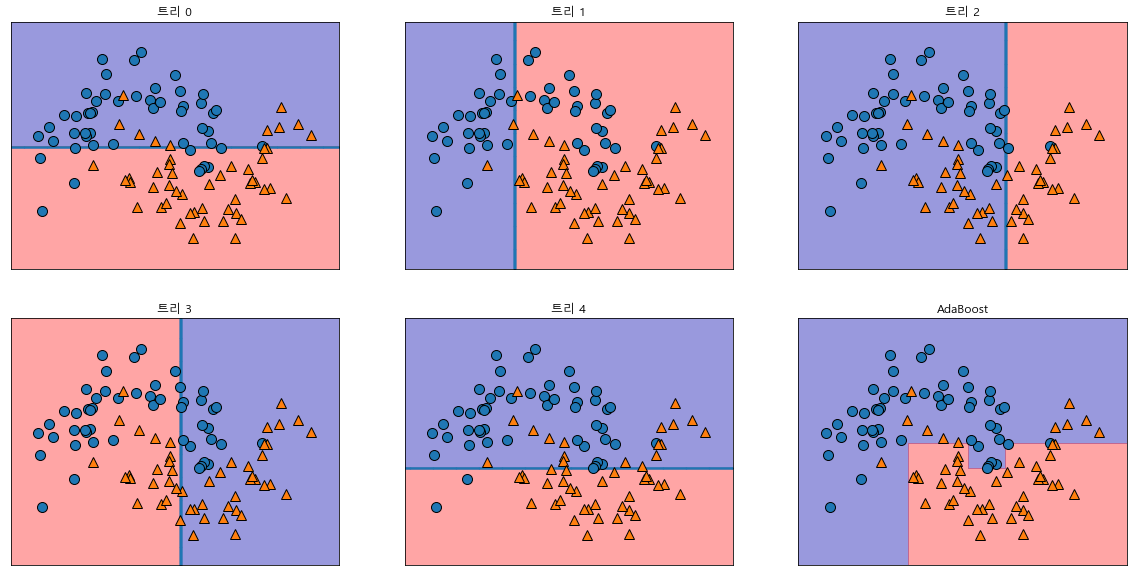

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)    
axes[-1, -1].set_title('AdaBoost')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [38]:
# 깊이가 1인 결정 트리를 사용하기 때문에 각 트리의 결정 경계가 직선 하나.

In [39]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print('train acc: {:.3f}'.format(ada.score(Xc_train, yc_train)))
print('test acc: {:.3f}'.format(ada.score(Xc_test, yc_test)))

train acc: 1.000
test acc: 0.986


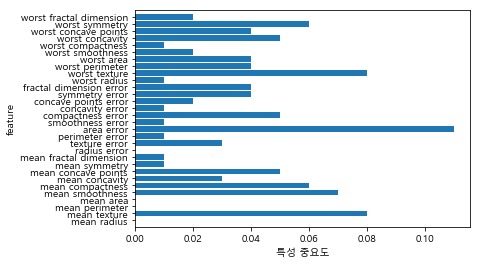

In [40]:
plot_feature_importances_cancer(ada)